<a href="https://colab.research.google.com/github/harishchowdaryvunnam/Intern-Assignmnet/blob/main/Internship_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect google drive for importing data

In [1]:
from google.colab import drive
drive.mount('content')

Mounted at content


Import Necessary Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score , precision_score, recall_score, confusion_matrix , f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Import train and test data sets

In [243]:
train = pd.read_csv("/content/content/MyDrive/Trails/Miskaa/train.csv")
test = pd.read_csv("/content/content/MyDrive/Trails/Miskaa/test.csv")

In [244]:
#to use for final submission
submission = test

**Data Cleaning**

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

From the above view we can understand PassengerID, Name , Ticket ,Cabin are not required because they are not similar and they are unique for everyone

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Same applies for test data set so lets subset or drop the unique columns

In [117]:
train = train.drop(columns= ["PassengerId","Name","Ticket","Cabin"],axis=1)
test = test.drop(columns= ["PassengerId","Name","Ticket","Cabin"],axis=1)

In [80]:
(train.shape,test.shape)

((891, 8), (418, 7))

Check for null values

In [81]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Here as we can see age has 177 missing values so lets check for outliers by plotting boxplot and for emberked we can directly impute with mode

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


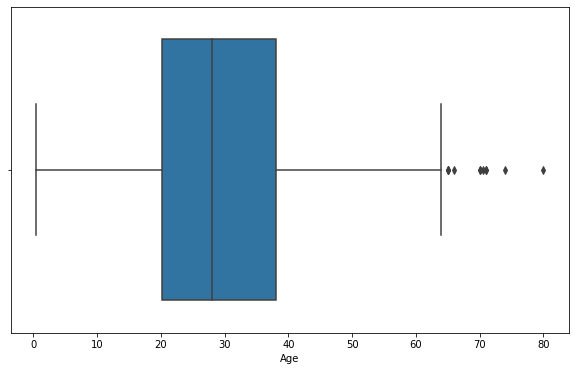

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(train["Age"])

As we can see outliers so lets impute with median which is better than mean

In [118]:
train["Age"] , train["Embarked"] = train["Age"].fillna(train["Age"].median()),train["Embarked"].fillna(train["Embarked"].mode()[0])

Now lets check for test dataset

In [84]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

We will follow the same things followed for train dataset

In [119]:
test["Age"], test["Embarked"] = test["Age"].fillna(test["Age"].median()),test["Embarked"].fillna(test["Embarked"].mode()[0])

Now lets get the datatypes of the columns

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [87]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [89]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,2.265550,29.599282,0.447368,0.392344,35.627188
std,0.841838,12.703770,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Now the categorical data is first labelled using Label Encoder and then converted into numerical using dummy variable(one-hot encoding)

In [120]:
le = LabelEncoder()
train["Embarked"] = le.fit_transform(train["Embarked"])
train["Sex"] = le.fit_transform(train["Sex"])
test["Embarked"] = le.fit_transform(test["Embarked"])
test["Sex"] = le.fit_transform(test["Sex"])

In [121]:
train["Sex"], train["Embarked"]= pd.get_dummies(train["Sex"],drop_first=True), pd.get_dummies(train["Embarked"],drop_first =True)
test["Sex"], test["Embarked"]= pd.get_dummies(test["Sex"],drop_first=True), pd.get_dummies(test["Embarked"],drop_first= True)

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


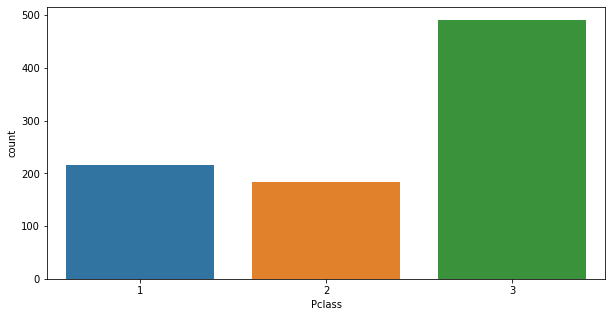

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(train["Pclass"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


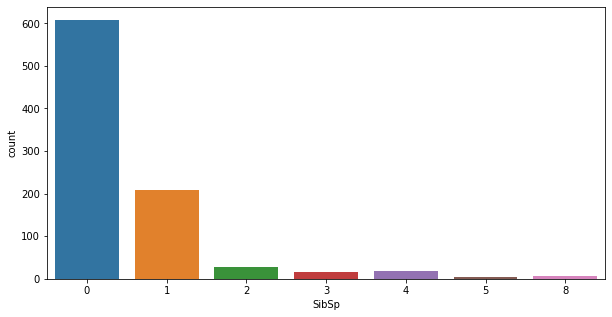

In [124]:
plt.figure(figsize=(10,5))
sns.countplot(train["SibSp"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


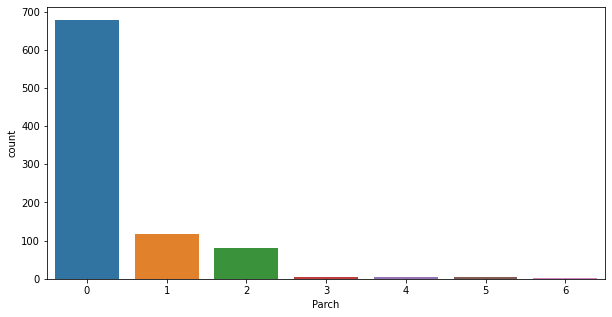

In [129]:
plt.figure(figsize=(10,5))
sns.countplot(train["Parch"])

<Figure size 720x360 with 0 Axes>

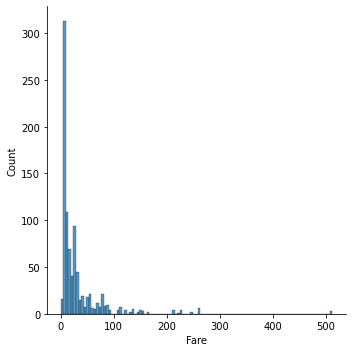

In [130]:
plt.figure(figsize=(10,5))
sns.displot(train["Fare"])

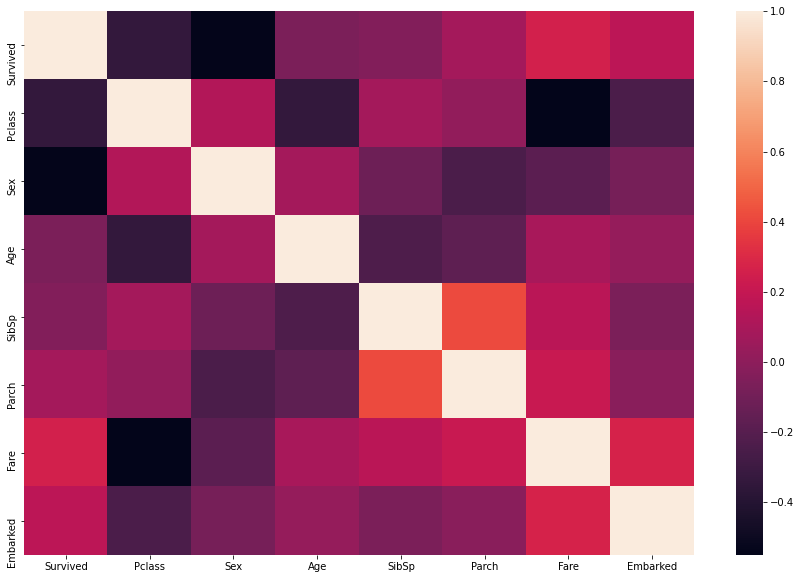

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())

As the data is not normalized lets normalize the data

In [133]:
def normalization(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [135]:
train = normalization(train)
test = normalization(test)

Defining the target and features to different variables

In [138]:
x = train.drop(columns= ["Survived"],axis=1)

In [139]:
y = train["Survived"]

Spliting data into 70% train and 30% validation

In [140]:
xtrain , xvalid , ytrain , yvalid = train_test_split(x,y,test_size= 0.3 , random_state = 45)

**Model Building**

In [165]:
def model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

Model 1 XGB Classifier

In [161]:
from xgboost import XGBClassifier
model1 = XGBClassifier().fit(xtrain, ytrain)

In [163]:
pred1 = model1.predict(xvalid)

In [166]:
model_report(yvalid,pred1)

Accuracy =  0.832089552238806
Precision =  0.7272727272727273
Recall =  0.8
F1 Score =  0.761904761904762


Lets fine tune by giving some parameters

In [182]:
model2 = XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.6,
                      objective='binary:logistic', 
                      n_estimators=3600, 
                      reg_alpha = 0.3,
                      max_depth=12, 
                      gamma=10).fit(xtrain, ytrain)

Above parameter values are taken randomly choosen and tested then suitable value for more accuracy are given here

In [183]:
pred2 = model2.predict(xvalid)

In [184]:
model_report(yvalid,pred2)

Accuracy =  0.835820895522388
Precision =  0.75
Recall =  0.7666666666666667
F1 Score =  0.7582417582417583


LGBM Classifier

In [196]:
import lightgbm as lgbm
model3 = lgbm.LGBMClassifier().fit(xtrain,ytrain)
pred3 = model3.predict(xvalid)

In [202]:
model_report(yvalid,pred3)

Accuracy =  0.8544776119402985
Precision =  0.7628865979381443
Recall =  0.8222222222222222
F1 Score =  0.7914438502673796


Lets do some finetuning

In [226]:
model4 = lgbm.LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0,
        importance_type='split', learning_rate=0.001, max_depth=8,
        min_child_samples=20, min_child_weight=0.001,
        n_estimators=3500, n_jobs=-1, num_leaves=20,
        random_state=45).fit(xtrain,ytrain)

In [227]:
pred4  = model4.predict(xvalid)

In [228]:
model_report(yvalid,pred4)

Accuracy =  0.8656716417910447
Precision =  0.7872340425531915
Recall =  0.8222222222222222
F1 Score =  0.8043478260869565


There is a slight increase in accuracy and when we compare all the model reports of 4 models model4 has high accuracy so lets use model4 for predicting test data

In [229]:
testpred = model4.predict(test)

In [245]:
submission["Survived"] = testpred

In [246]:
submission

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0
